In [ ]:
# !pip install --upgrade pandas

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/텍스트마이닝/data/ratings_train.txt', encoding='utf-8', sep='\t')
df.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        150000 non-null  int64 
 1   document  149995 non-null  object
 2   label     150000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.4+ MB


In [ ]:
df = df[df['document'].notnull()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149995 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        149995 non-null  int64 
 1   document  149995 non-null  object
 2   label     149995 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.6+ MB


In [ ]:
df['label'].value_counts()

label
0    75170
1    74825
Name: count, dtype: int64

In [ ]:
import re

df['document'] = df['document'].apply(lambda x : re.sub(r'[^ㄱ-ㅣ가-힣]+'," ", x))
df.head()

,id,document,label
0,9976970,아 더빙 진짜 짜증나네요 목소리,0
1,3819312,흠 포스터보고 초딩영화줄 오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 솔직히 재미는 없다 평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화 스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [ ]:
df_t = pd.read_csv('/content/drive/MyDrive/텍스트마이닝/data/ratings_test.txt', encoding='utf-8', sep='\t')
df_t.head()

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0


In [ ]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        50000 non-null  int64 
 1   document  49997 non-null  object
 2   label     50000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.1+ MB


In [ ]:
df_t = df_t[df_t['document'].notnull()]
df_t.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49997 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        49997 non-null  int64 
 1   document  49997 non-null  object
 2   label     49997 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.5+ MB


In [ ]:
df_t['label'].value_counts()

label
1    25171
0    24826
Name: count, dtype: int64

In [ ]:
df_t['document'] = df_t['document'].apply(lambda x : re.sub(r'[^ㄱ-ㅣ가-힣]+'," ", x))
df_t.head()

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,,0
2,8544678,뭐야 이 평점들은 나쁘진 않지만 점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임 돈주고 보기에는,0
4,6723715,만 아니었어도 별 다섯 개 줬을텐데 왜 로 나와서 제 심기를 불편하게 하죠,0


분석모델 구축

In [ ]:
!pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 35.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 23.9 MB/s eta 0:00:00


In [ ]:
#한국어 형태소 분석기
from konlpy.tag import Okt
okt = Okt()

In [ ]:
def okt_tokenizer(text):
    tokens = okt.morphs(text)
    return tokens

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(tokenizer=okt_tokenizer, ngram_range=(1,2), min_df = 3, max_df = 0.9)
# 토큰화 작업: okt_tokenizer
# ngram_range = (1,2 ) 단어 크기 1개 ~ 2개
# min_df=3 출현빈도가 최소 3번 이상
# max_df=0.9 최대 90% 이하 등장
tfidf.fit(df_t['document'])
tfidf_t = tfidf.transform(df_t['document'])

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=0)
lr.fit(tfidf_t, df_t['label'])

LogisticRegression(random_state=0)

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {'C' : [1, 3, 3.5, 4, 4.5, 5]}
lr_grid_cv = GridSearchCV(lr, param_grid=params, cv = 3, scoring = 'accuracy', verbose = 1)
#cv : cross validation 교차 검증
#정확도 측정 , verbose=1 진행과정을 출력(0으로 설정 >> 출력 안함)

In [ ]:
#감성 분류 모델 구축

lr_grid_cv.fit(tfidf_t, df_t['label'])

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3, estimator=LogisticRegression(random_state=0),
             param_grid={'C': [1, 3, 3.5, 4, 4.5, 5]}, scoring='accuracy',
             verbose=1)

In [ ]:
print(lr_grid_cv.best_params_,  round(lr_grid_cv.best_score_, 3))

{'C': 3} 0.83


In [ ]:
# 최적 매개변수의 best 모델 >> 저장
lr_best = lr_grid_cv.best_estimator_

In [ ]:
lr_best

LogisticRegression(C=3, random_state=0)

In [ ]:
#평가용 데이터의 피처 벡터화 feature >> vector

tfidf_t = tfidf.transform(df_t['document'])

In [ ]:
t_predict = lr_best.predict(tfidf_t)

In [ ]:
t_predict

array([1, 0, 0, ..., 1, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score

print('감성 분석 정확도: ', round(accuracy_score(df_t['label'], t_predict),3))

감성 분석 정확도:  0.93


감성 예측 프로그램

In [ ]:
st = input('감성 분석할 문장 입력 >>')

감성 분석할 문장 입력 >>나는 너를 사랑해


In [ ]:
#입력 텍스트 전처리

st = re.compile(r'[ㄱ-ㅣ가-힣]+').findall(st)
print(st)

['나는', '너를', '사랑해']


In [ ]:
st = [" ".join(st)]
st

['나는 너를 사랑해']

In [ ]:
#입력 텍스트 피처 벡터화

tfidf_st = tfidf.transform(st)

In [ ]:
#최적 감성 분석 모델에 적용하여 감성 분석 평가

st_predict = lr_best.predict(tfidf_st)

In [ ]:
st_predict

array([1])

In [ ]:
#예측 값 출력하기

if (st_predict == 0):
    print(st[0], ' >> 부정')
else:
    print(st[0], ' >> 긍정')

나는 너를 사랑해  >> 긍정


코로나 데이터 분석

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
path = '/content/drive/MyDrive/텍스트마이닝/data/코로나_naver_news.json'


In [ ]:
#데이터 불러오기
import json

file_name = '/content/drive/MyDrive/텍스트마이닝/data/코로나_naver_news.json'

with open(file_name, encoding='utf-8') as file:
    data = json.load(file)

print(data)

[{'cnt': 1, 'description': '<b>코로나</b>발 경제 위기 대응을 위해 돈 쓸 곳은 늘어났지만, 국세 수입은 줄어들면서 정부의 재정 마련에 대한 우려가 컸다. 이 때문에 한국개발원(KDI) 등 국책연구기관들은 증세를 화두로 꺼내들었지만, 정부 여당은 증세에... ', 'pDate': '2020-06-04 14:12:00', 'title': "결국 '증세론' 먼저 꺼내든 與…&quot;증세없는 '기본소득' 불가능&quot;"}, {'cnt': 2, 'description': '▲ 지난 2일 창녕군보건소 앞에 설치한 선별진료소에서 검사자가 체온을 측정하고 있다.©(사진제공=창녕군청) <b>코로나</b> 장기화 대비 비대면 선별진료 도입 경남 창녕군은 지난 2월 28일 도내 최초로 <b>코로나</b>19 선별진료소... ', 'pDate': '2020-06-04 14:12:00', 'title': '창녕군, ‘창녕형’비대면 선별진료소 운영'}, {'cnt': 3, 'description': "한편, ‘설현’은 최근 <b>코로나</b>19 바이러스를 다룬, MBC ‘시리즈M’ PANDEMIC(세계적 유행)에서 다큐멘터리 내레이션에 처음 도전해 호평을 받았으며, tvN의 새 드라마 '낮과 밤' 출연을 검토중이다. 게임과 이벤트에 대한... ", 'pDate': '2020-06-04 14:12:00', 'title': "DK모바일, 메인 홍보 모델로 AOA '설현' 선정"}, {'cnt': 4, 'description': '변화의 핵심 중에서는 우리 사회가 신종 <b>코로나</b>바이러스 감염증(<b>코로나</b>19)의 위기를 마주하고 있다. 언제 끝이날 지 또 앞으로 어떠한 미래가 펼치질 지 모른다. 국가가 나서서 국민의 어려움을 해결해 줘야 한다. 저희... ', 'pDate': '2020-06-04 14:12:00', 'title': '김병민 &quot;기본소득도 필요하면 논의 테이블에 올려야&quot; [인터뷰]'}, {'cnt': 5, 

In [ ]:
title = []
desc = []

for item in data:
    title.append(item['title'])
    desc.append(item['description'])

In [ ]:
title

["결국 '증세론' 먼저 꺼내든 與…&quot;증세없는 '기본소득' 불가능&quot;",
 '창녕군, ‘창녕형’비대면 선별진료소 운영',
 "DK모바일, 메인 홍보 모델로 AOA '설현' 선정",
 '김병민 &quot;기본소득도 필요하면 논의 테이블에 올려야&quot; [인터뷰]',
 '이재갑 장관, 고용안정지원금 서울센터 방문',
 "'부산행'→'반도'로 이어지는 한국형 좀비 세계관, 칸의 선택 받았다",
 "31년만 첫 '불허'에도 홍콩, 톈안문 추모 촛불",
 '국내 3대 항만 4월 물동량 ‘인천항만 상승곡선’',
 '경기도의회 농정해양위, 농민기본소득 도입 이재명 지사와 집행부에 강력 촉구',
 '이용빈 원내부대표 &quot;<b>코로나</b> 대응 의료진·노동자 건강권 보장해야&quot;',
 '<b>코로나</b>19로 인해 변한 원광한의대 경혈학 실습 풍경',
 '경산시 농산물 드라이브 스루 특별할인 판매행사 개최',
 '당신이 아는 미술, 시장이 아는 미술 ④ 한국 현대 미술 시장을 이끄는 작가',
 '제25회 부산국제영화제 공식 상영작 모집 [공식]',
 '수도권 <b>코로나</b>19 확진자 산발적으로 늘어…하루 새 47명 증가',
 '동작구, 전통시장 무료 배송서비스 사업 실시',
 '서울 건강용품 세미나서 무더기 확진…199명 검사',
 'BBQ, 상반기 신입 및 경력직 공채 시행',
 '중국 굴착기 판매량 상승에도...두산인프라코어 긴장하는 이유는',
 '미소짓는 의료진',
 "'포스트 <b>코로나</b>' 대비…M&amp;A·투자 잰걸음 나서는 게임사",
 "휴넷, 리더십 게임러닝 프로그램 '아르고' 출시",
 '광주 서구 양동, 민·관 협력으로 주거환경 개선',
 '손흥민의 고백, “3주간의 군사훈련, 힘들지만 즐겼다”',
 '靑 “카타르 LNG선 수주, 문 대통령 경제외교 결실”',
 '[유통÷나누기 세상＋더하기] 세븐일레븐, 유치원 통학차량에 공기청정기 설치...',
 '김포 혁신교육지구 사업, 특수교육대상자를 위한 교육과정 지원'

In [ ]:
df = pd.DataFrame({'title' : title, 'description' : desc})
df.head()

,title,description
0,결국 '증세론' 먼저 꺼내든 與…&quot;증세없는 '기본소득' 불가능&quot;,"<b>코로나</b>발 경제 위기 대응을 위해 돈 쓸 곳은 늘어났지만, 국세 수입은 ..."
1,"창녕군, ‘창녕형’비대면 선별진료소 운영",▲ 지난 2일 창녕군보건소 앞에 설치한 선별진료소에서 검사자가 체온을 측정하고 있다...
2,"DK모바일, 메인 홍보 모델로 AOA '설현' 선정","한편, ‘설현’은 최근 <b>코로나</b>19 바이러스를 다룬, MBC ‘시리즈M’..."
3,김병민 &quot;기본소득도 필요하면 논의 테이블에 올려야&quot; [인터뷰],변화의 핵심 중에서는 우리 사회가 신종 <b>코로나</b>바이러스 감염증(<b>코로...
4,"이재갑 장관, 고용안정지원금 서울센터 방문",이재갑 고용노동부 장관은 6월3일(수) 11시에 <b>코로나</b>19 긴급 고용...


<h3>감성분석 실행</h3>

In [ ]:
#title 컬럼에 대한 감성 분석 실행

#feature >> vector
title_tfidf = tfidf.transform(df['title'])

#최적 매개변수 학습 모델 감성분석
title_predict = lr_best.predict(title_tfidf)

#결과값 데이터 프레임에 저장
df['title_label'] = title_predict

In [ ]:
#description 컬럼에 대한 감성 분석 실행

#feature >> vector
desc_tfidf = tfidf.transform(df['description'])

#최적 매개변수 학습 모델 감성분석
desc_predict = lr_best.predict(desc_tfidf)

#결과값 데이터 프레임에 저장
df['desc_label'] = desc_predict

In [ ]:
df.head()

,title,description,title_label,desc_label
0,결국 '증세론' 먼저 꺼내든 與…&quot;증세없는 '기본소득' 불가능&quot;,"<b>코로나</b>발 경제 위기 대응을 위해 돈 쓸 곳은 늘어났지만, 국세 수입은 ...",0,0
1,"창녕군, ‘창녕형’비대면 선별진료소 운영",▲ 지난 2일 창녕군보건소 앞에 설치한 선별진료소에서 검사자가 체온을 측정하고 있다...,1,0
2,"DK모바일, 메인 홍보 모델로 AOA '설현' 선정","한편, ‘설현’은 최근 <b>코로나</b>19 바이러스를 다룬, MBC ‘시리즈M’...",0,1
3,김병민 &quot;기본소득도 필요하면 논의 테이블에 올려야&quot; [인터뷰],변화의 핵심 중에서는 우리 사회가 신종 <b>코로나</b>바이러스 감염증(<b>코로...,0,1
4,"이재갑 장관, 고용안정지원금 서울센터 방문",이재갑 고용노동부 장관은 6월3일(수) 11시에 <b>코로나</b>19 긴급 고용...,1,0


In [ ]:
df.to_csv('/content/drive/MyDrive/텍스트마이닝/data/코로나_label.csv', encoding='utf-8')

In [ ]:
df['title_label'].value_counts()

title_label
0    469
1    331
Name: count, dtype: int64

In [ ]:
df['desc_label'].value_counts()


desc_label
1    460
0    340
Name: count, dtype: int64

감성 분석 결과 확인

방법1

In [ ]:
columns_name = ['title', 'title_label', 'description', 'desc_label']
NEG_df = []
POS_df = []

for i, data in df.iterrows():
    title = data["title"]
    description = data["description"]
    title_label = data["title_label"]
    desc_label = data["desc_label"]

    if desc_label == 0:
        # 부정 감성 샘플만 추출
        NEG_df.append([title, title_label, description, desc_label])
    else:
        # 긍정 감성 샘플만 추출
        POS_df.append([title, title_label, description, desc_label])

# 리스트를 데이터프레임으로 변환
NEG_df = pd.DataFrame(NEG_df, columns=columns_name)
POS_df = pd.DataFrame(NEG_df, columns=columns_name)


방법2

In [ ]:
columns_name = ['title', 'title_label', 'description', 'desc_label']
neg_df = pd.DataFrame(columns = columns_name)
pos_df = pd.DataFrame(columns = columns_name)

for i, data in df.iterrows():
    title = data['title']
    desc = data['description']
    title_label = data['title_label']
    desc_label = data['desc_label']

    #설명 라벨이 부정 감성인 샘플만 추출
    if desc_label == 0:
        neg_df = pd.concat([neg_df, pd.DataFrame([[title, title_label, desc, desc_label]], columns=columns_name)], ignore_index=True)
    else: #긍정 감성인 샘풀만 추출
        pos_df = pd.concat([pos_df, pd.DataFrame([[title, title_label, desc, desc_label]], columns=columns_name)], ignore_index=True)


In [ ]:
neg_df

,title,title_label,description,desc_label
0,결국 '증세론' 먼저 꺼내든 與…&quot;증세없는 '기본소득' 불가능&quot;,0,"<b>코로나</b>발 경제 위기 대응을 위해 돈 쓸 곳은 늘어났지만, 국세 수입은 ...",0
1,"창녕군, ‘창녕형’비대면 선별진료소 운영",1,▲ 지난 2일 창녕군보건소 앞에 설치한 선별진료소에서 검사자가 체온을 측정하고 있다...,0
2,"이재갑 장관, 고용안정지원금 서울센터 방문",1,이재갑 고용노동부 장관은 6월3일(수) 11시에 <b>코로나</b>19 긴급 고용...,0
3,"'부산행'→'반도'로 이어지는 한국형 좀비 세계관, 칸의 선택 받았다",0,하지만 올해 신종 <b>코로나</b>바이러스 감염증(<b>코로나</b>19) 여파로...,0
4,"31년만 첫 '불허'에도 홍콩, 톈안문 추모 촛불",0,경찰은 <b>코로나</b>19 감염이 우려된다며 8명 이상을 모이는 집회를 봉쇄해왔...,0
...,...,...,...,...
335,"BNP파리바 &quot;<b>코로나</b>19 채권, 국제금융시장서 184조4천억원...",0,국제금융시장에서 <b>코로나</b>19 채권이 1천515억달러(약 184조4천억원)...,0
336,"여주시의회 박시선 의원, 체류형 관광도시 로드맵과 전략수립 촉구",0,이항진 여주시장은 &quot;깨끗한 자연환경과 더불어 <b>코로나</b>19 청정지...,0
337,"[세계의 눈] &quot;<b>코로나</b>19 영향, 현대차 매출 큰 타격&quo...",1,글로벌기업 현대.기아차가 <b>코로나</b>19의 여파로 해외시장에서 고전을 면치 ...,0
338,"중부발전, 소규모 태양광사업자 REC 판매대금 '선 지급'",0,한국중부발전 본사 전경 한국중부발전(사장 박형구)은 <b>코로나</b>19 장기화로...,0


In [ ]:
len(neg_df)
len(pos_df)

460

In [ ]:
pos_df

,title,title_label,description,desc_label
0,"DK모바일, 메인 홍보 모델로 AOA '설현' 선정",0,"한편, ‘설현’은 최근 <b>코로나</b>19 바이러스를 다룬, MBC ‘시리즈M’...",1
1,김병민 &quot;기본소득도 필요하면 논의 테이블에 올려야&quot; [인터뷰],0,변화의 핵심 중에서는 우리 사회가 신종 <b>코로나</b>바이러스 감염증(<b>코로...,1
2,국내 3대 항만 4월 물동량 ‘인천항만 상승곡선’,1,전국 컨테이너 처리량 243만TEU…2.5%↓ 국내 항만은 4월 들어 신종 <b>코...,1
3,"경기도의회 농정해양위, 농민기본소득 도입 이재명 지사와 집행부에 강력 촉구",1,"한편, '<b>코로나</b>19'로 인한 해외의 식재료 사재기에서 보듯이 국민들의 ...",1
4,<b>코로나</b>19로 인해 변한 원광한의대 경혈학 실습 풍경,1,<b>코로나</b>19 사태가 지속되면서 한의대 강의 역시 대부분 비대면으로 이뤄지...,1
...,...,...,...,...
455,"[IS포토|대종상영화제] 이병헌, 자켓자락 휘날리며 '후다닥~'",0,제56회 대종상영화제 참석한 이병헌제56회 대종상영화제 참석한 이병헌 <b>코로나<...,1
456,"[IS포토|대종상영화제] 강기영, '기분좋은 손인사'",1,제56회 대종상영화제 참석한 강기영제56회 대종상영화제 참석한 강기영 <b>코로나<...,1
457,괴산보건소 '직장인 야간운동교실' 재개,1,당초 군 보건소 다목적실에서 진행됐던 이 프로그램은 <b>코로나</b>19 확산 방...,1
458,치과의사 7000명 모이는 행사 앞두고 치협 회장 “행사 취소해달라”,0,이상훈 회장은 “<b>코로나</b>19 신규 확진자가 수도권에서 발생했고 정부는 수...,1


긍정 감성 분석 시각화

In [ ]:
pos_desc = pos_df['description']
pos_desc

0      한편, ‘설현’은 최근 <b>코로나</b>19 바이러스를 다룬, MBC ‘시리즈M’...
1      변화의 핵심 중에서는 우리 사회가 신종 <b>코로나</b>바이러스 감염증(<b>코로...
2      전국 컨테이너 처리량 243만TEU…2.5%↓ 국내 항만은 4월 들어 신종 <b>코...
3      한편, '<b>코로나</b>19'로 인한 해외의 식재료 사재기에서 보듯이 국민들의 ...
4      <b>코로나</b>19 사태가 지속되면서 한의대 강의 역시 대부분 비대면으로 이뤄지...
                             ...                        
455    제56회 대종상영화제 참석한 이병헌제56회 대종상영화제 참석한 이병헌 <b>코로나<...
456    제56회 대종상영화제 참석한 강기영제56회 대종상영화제 참석한 강기영 <b>코로나<...
457    당초 군 보건소 다목적실에서 진행됐던 이 프로그램은 <b>코로나</b>19 확산 방...
458    이상훈 회장은 “<b>코로나</b>19 신규 확진자가 수도권에서 발생했고 정부는 수...
459    제56회 대종상영화제 참석한 문가영제56회 대종상영화제 참석한 문가영 <b>코로나<...
Name: description, Length: 460, dtype: object

In [ ]:
pos_desc_noun = []

for d in pos_desc:
    pos_desc_noun.append(okt.nouns(d))

In [ ]:
pos_desc_noun

[['한편',
  '설현',
  '은',
  '최근',
  '코로나',
  '바이러스',
  '시리즈',
  '세계',
  '유행',
  '다큐멘터리',
  '내레이션',
  '처음',
  '도전',
  '호평',
  '의',
  '새',
  '드라마',
  '낮',
  '밤',
  '출연',
  '검토',
  '게임',
  '이벤트',
  '대한'],
 ['변화',
  '핵심',
  '중',
  '우리',
  '사회',
  '신종',
  '코로나',
  '바이러스',
  '감염증',
  '코로나',
  '의',
  '위기',
  '마주',
  '언제',
  '끝',
  '날',
  '또',
  '앞',
  '미래',
  '국가',
  '국민',
  '어려움',
  '해결',
  '저희'],
 ['전국',
  '컨테이너',
  '처리',
  '량',
  '국내',
  '항만',
  '신종',
  '코로나',
  '바이러스',
  '감염증',
  '코로나',
  '사태',
  '본격',
  '물동량',
  '부진',
  '그',
  '와중',
  '인천',
  '항',
  '중국',
  '항만',
  '정상화'],
 ['한편',
  '코로나',
  '로',
  '해외',
  '식',
  '재료',
  '사재기',
  '국민',
  '먹거리',
  '안정',
  '생산',
  '것',
  '포스트',
  '코로나',
  '의',
  '과제',
  '부각',
  '농민',
  '기본소득',
  '도입',
  '통해',
  '안정',
  '생산',
  '기반',
  '확충',
  '것'],
 ['코로나',
  '사태',
  '지속',
  '한의대',
  '강의',
  '역시',
  '대부분',
  '비',
  '대면',
  '대면',
  '실습',
  '강의실',
  '풍경',
  '예전',
  '현재',
  '코로나',
  '로',
  '대부분',
  '학과',
  '수업',
  '비',
  '대면'],
 ['이번',
  '행사',
  '코로나',
  '확대',
 

In [ ]:
pos_desc_noun_join = []

for d in pos_desc_noun:
    d2 = [w for w in d if len(w) > 1] #길이가 1보다 큰 토큰만 추출
    pos_desc_noun_join.append(" ".join(d2))

In [ ]:
pos_desc_noun_join

['한편 설현 최근 코로나 바이러스 시리즈 세계 유행 다큐멘터리 내레이션 처음 도전 호평 드라마 출연 검토 게임 이벤트 대한',
 '변화 핵심 우리 사회 신종 코로나 바이러스 감염증 코로나 위기 마주 언제 미래 국가 국민 어려움 해결 저희',
 '전국 컨테이너 처리 국내 항만 신종 코로나 바이러스 감염증 코로나 사태 본격 물동량 부진 와중 인천 중국 항만 정상화',
 '한편 코로나 해외 재료 사재기 국민 먹거리 안정 생산 포스트 코로나 과제 부각 농민 기본소득 도입 통해 안정 생산 기반 확충',
 '코로나 사태 지속 한의대 강의 역시 대부분 대면 대면 실습 강의실 풍경 예전 현재 코로나 대부분 학과 수업 대면',
 '이번 행사 코로나 확대 장기 화로 지역 소비 판로 어려움 농가 돕기 소비 촉진 위해 마련 행사 계란 연근 감자 새송이 방울토마토 깻잎 양파 오이 고추 품목',
 '최근 갤러리 현대 창업 주년 기념 작품 전시 코로나 영향 마스크 착용 관람객 미술 트렌드 한국 미술 시장 정태희 서울 옥션 스페셜리스트 세계 경기 침체 코로나 여파',
 '서울 경기 인천 수도권 개척 교회 신종 코로나 바이러스 감염증 코로나 진자 산발 증가 모양새 감염 경로 진자 방역 당국 긴장',
 '오후 서울 중랑구 의료 의료 잠시 콘서트 신종 코로나 바이러스 감염증 코로나 환자 진료 위해 수고 의료 가수 공연 보고 뉴스',
 '이승원 넷마블 대표 신종 코로나 바이러스 감염증 코로나 확산 언택트 비대 문화 차세대 미래 먹거리 부상 포스트 코로나 준비 게임 사가 게임 사의 산업 구조 개편 코로나',
 '플립 러닝 온라인 학습 교실 토론 심화 학습 거꾸로 교실 불리 포스트 코로나 시대 교육 방식 주목 아르고 리더십 상황 게임 통해 리더십 유형',
 '도배 장판 침대 장롱 가구 교체 코로나 예방 방역 진행 주거 환경 조성 미자 양동 동장 이웃 위해 봉사',
 '코로나 사태 가운데 병영 생활 손흥민 경험 영국 화제 손흥민 서로 금방 이서 정말 서로 호흡',
 '청와대 해외 보가 문재인 대통령

부정 감성 분석 시각화

In [ ]:
neg_desc = neg_df['description']


neg_desc_noun = []
neg_desc_noun_join = []

for d in neg_desc:
    neg_desc_noun.append(okt.nouns(d))

for d in neg_desc_noun:
    d2 = [w for w in d if len(w) > 1]
    neg_desc_noun_join.append(" ".join(d2))

In [ ]:
neg_desc_noun_join

['코로나 경제 위기 대응 위해 국세 수입 정부 재정 마련 대한 우려 때문 한국 개발 국책 연구기관 증세 화두 정부 여당 증세',
 '지난 창녕군 보건소 설치 진료 검사 체온 측정 사진 제공 창녕군 코로나 장기 대비 비대 진료 도입 경남 창녕군 지난 도내 최초 코로나 진료',
 '이번 현장 방문 코로나 긴급 고용 안정 원금 신청 시작 이틀',
 '올해 신종 코로나 바이러스 감염증 코로나 여파 오프라인 행사 진행 공식 채널 통해 명칭 초청 리스트 공개 한편 반도 국내외',
 '경찰 코로나 감염 우려 이상 집회 봉쇄 지난 홍콩 국가보안법 시위 홍콩 경찰 코로나 확산 올해 불허 상황 처음 주최',
 '이용 의원 제공 이용 민주당 내부 대표 코로나 시화 장기 생활 방역 면서 코로나 현장 의료 진의 근무 환경 부당 처우 과중 노동 강도 인력 부족 문제',
 '세계 코로나 전례 위기 이로 국내외 영화계 예상 타격 부산 국제 영화제 국내외 상황 인지 예의 주시 정부 방침 권고 준수',
 '신종 코로나 바이러스 감염증 코로나 장기 화로 전통 시장 상인 매출 감소 점포 운영 어려움 투입 오프라인 무료 배송 서비스 운영 지원 지원 대상 남성 사계 시장',
 '수도권 중심 코로나 확산 가운데 주로 노인 참석 다단계 서울시 오늘 오전 기준 코로나 진자 감염 경로 수도권',
 '코로나 감안 면접 비대 역량 검사 도입 국내 최대 치킨 프랜차이즈 제너시스 비비큐 회장 채용 관계자 한국 대표 책임감 브랜드 로서 코로나 침체 채용 분위기',
 '판매량 급증 이유 신종 코로나 바이러스 감염증 코로나 확산 주춤 때문 올해 중국 코로나 여파 제대로 생산 활동 전개 시간 코로나',
 '맥도날드 코로나 방역 작업 대구 지하철 청소 근로자 빅맥 커피 증정 패션 업계 나눔 활동 동참 코오롱 인더스 트리 직원 성과 상금 코로나 어려움',
 '중앙 재난 안전 대책 본부 이하 대본 오전 정부 세종 청사 코로나 정례 브리핑 개최 코로나 사태 감염병 관리 대응 질병 관리 본부 전문성 취지 복수',
 '전국 투자

TF-IDF 활용 , DTM(Document Term Matrix 문서-단어 행렬) 구성

In [ ]:
#긍정 감성 단어 추출
pos_tfidf = TfidfVectorizer(tokenizer = okt_tokenizer, min_df = 3)
pos_dtm = pos_tfidf.fit_transform(pos_desc_noun_join)

In [ ]:
pos_tfidf.get_feature_names_out()

array(['가', '가격', '가구', '가능성', '가수', '가운데', '가장', '가정', '가지', '각국', '갈등',
       '감독', '감사', '감소', '감염', '감염병', '감염증', '강남', '강의', '강조', '개교', '개발',
       '개선', '개월', '개인', '개척', '개최', '개학', '거꾸로', '거래', '거리', '거머', '거주',
       '걱정', '건강', '검사', '검토', '게임', '격리', '결정', '경기', '경기도', '경남', '경북',
       '경영', '경우', '경제', '경제위기', '경험', '계기', '계속', '계층', '계획', '고객',
       '고등학교', '고용', '곳곳', '공간', '공감', '공개', '공급', '공단', '공동', '공모', '공사',
       '공연', '공유', '공인', '과정', '관객', '관계', '관계자', '관내', '관련', '관리', '관심',
       '관악구', '광고', '광주', '교실', '교육', '교육과정', '교육과정평가원', '교육부', '교육비',
       '교육지원청', '교육청', '교회', '구급', '구입', '국가', '국내', '국무회의', '국민', '국제',
       '국회', '군민', '군수', '권고', '규모', '규제', '그간', '그룹', '그린', '극복', '근무',
       '글래스', '글로벌', '금융', '금은', '금지', '급증', '기관', '기기', '기념', '기록', '기반',
       '기부', '기사', '기생충', '기술', '기업', '기업인', '기여', '기자', '기준', '기회', '기획',
       '긴급', '긴장', '김경준', '김대환', '김포시', '남녀', '노동자', '노력', '농가', '농산물',
       '농어', '농촌', '누구', '누리', '뉴딜', '뉴스', '뉴시

In [ ]:
pos_vocab = dict()

for i, word in enumerate(pos_tfidf.get_feature_names_out()):
    pos_vocab[word] = pos_dtm.getcol(i).sum()

In [ ]:
pos_vocab

{'가': 0.7774275307440985,
 '가격': 1.0954349279078794,
 '가구': 1.3358965464626849,
 '가능성': 1.5302439059476058,
 '가수': 3.9063940459775894,
 '가운데': 4.2136220531707025,
 '가장': 2.8082312043853497,
 '가정': 1.7962382441248539,
 '가지': 1.631950411891669,
 '각국': 1.3386248728094872,
 '갈등': 1.2330724119530667,
 '감독': 3.03092147695396,
 '감사': 2.5629190096050687,
 '감소': 1.8262975368685397,
 '감염': 5.984480985539005,
 '감염병': 2.449372321640903,
 '감염증': 15.207483441469856,
 '강남': 1.1916775166074596,
 '강의': 2.0151284598452044,
 '강조': 1.3643679727367877,
 '개교': 0.912254241987994,
 '개발': 5.121004389705384,
 '개선': 1.5985466098188517,
 '개월': 0.7736588040843919,
 '개인': 1.7552450639167068,
 '개척': 2.0883552368220957,
 '개최': 5.00036870553296,
 '개학': 1.3217837777298216,
 '거꾸로': 0.931487635504421,
 '거래': 2.555456709611875,
 '거리': 5.679351333248354,
 '거머': 3.03092147695396,
 '거주': 1.0243289420510429,
 '걱정': 1.4296048773698051,
 '건강': 4.10783500603004,
 '검사': 3.939089951781347,
 '검토': 1.6833687450512322,
 '게임': 1.80232

In [ ]:
pos_dtm.getcol(2).sum()

#DTM index = 2 일때 (3번째 열에 위치한) 단어
#fit_transform으로 벡터화를 한 값으로 나오는 빈도수를 더한 것

1.3358965464626849

In [ ]:
pos_words = sorted(pos_vocab.items(), key = lambda x : x[1], reverse = True)
pos_words[:5]

[('코로나', 41.44191477328468),
 ('바이러스', 16.822730313685994),
 ('위해', 16.23646143616109),
 ('신종', 15.713755047741056),
 ('감염증', 15.207483441469856)]

In [ ]:
#부정 감성 단어 추출
neg_tfidf = TfidfVectorizer(tokenizer=okt_tokenizer, min_df=3)
neg_dtm = neg_tfidf.fit_transform(neg_desc_noun_join)


In [ ]:
neg_vocab = dict()

for i, word in enumerate(neg_tfidf.get_feature_names_out()):
    neg_vocab[word] = neg_dtm.getcol(i).sum()
neg_words = sorted(neg_vocab.items(), key = lambda x : x[1], reverse = True)

In [ ]:
neg_words[:5]

[('코로나', 32.55100255836262),
 ('바이러스', 12.881693213286393),
 ('신종', 11.672575170314422),
 ('감염증', 11.536392271585585),
 ('위해', 9.73136967459899)]

긍정/ 부정 시각화

In [ ]:
!pip install koreanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 15.4 MB/s eta 0:00:00


In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm


import matplotlib as mpl
from matplotlib import font_manager, rc

# 그래프를 노트북 안에 그리기 위해 설정
%matplotlib inline

# 글꼴 경로 지정
font_path = '/content/drive/MyDrive/malgun.ttf'  # 윈도우에 설치된 맑은 고딕 폰트 경로

# 폰트 파일 확인
import os
if not os.path.exists(font_path):
    print("폰트 파일을 찾을 수 없습니다.")

# 폰트 이름 얻어오기
font_name = fm.FontProperties(fname=font_path).get_name()

# matplotlib의 rc(run command) 기능을 이용하여 글꼴 설정
mpl.rc('font', family=font_name)

# 유니코드에서  음수 부호 설정
mpl.rc('axes', unicode_minus=False)

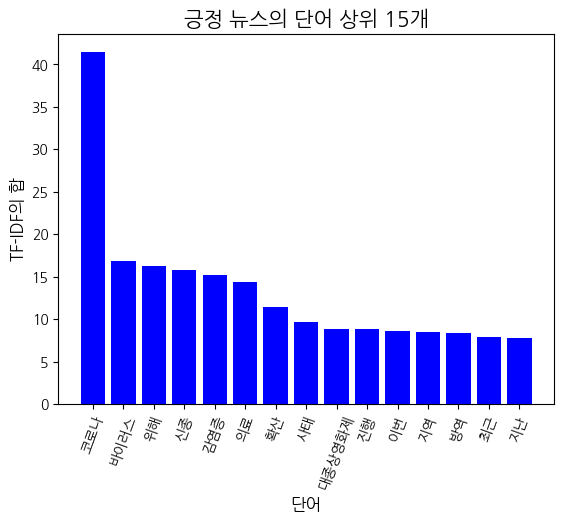

In [ ]:
import koreanize_matplotlib
max = 15

plt.bar(range(max), [i[1] for i in pos_words[:max]], color = "blue")
plt.title("긍정 뉴스의 단어 상위 %d개" %max, fontsize = 15)
plt.xlabel("단어", fontsize = 12)
plt.ylabel("TF-IDF의 합", fontsize = 12)
plt.xticks(range(max), [i[0] for i in pos_words[:max]], rotation = 70)

plt.show()

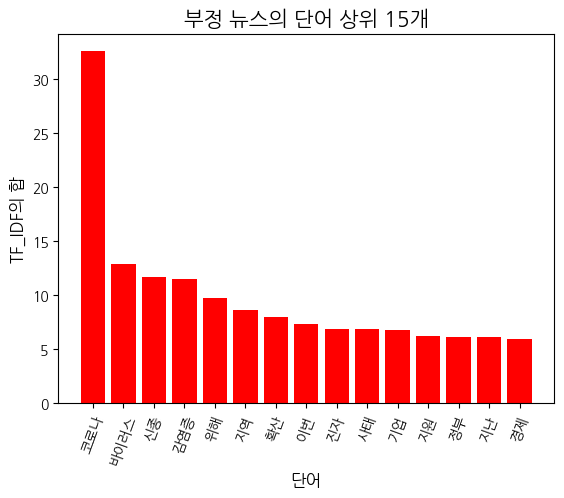

In [ ]:
plt.bar(range(max), [i[1] for i in neg_words[:max]], color='red')
plt.title("부정 뉴스의 단어 상위 %d개" %max, fontsize=15)
plt.xlabel("단어", fontsize=12)
plt.ylabel("TF_IDF의 합", fontsize=12)
plt.xticks(range(max), [i[0] for i in neg_words[:max]], rotation=70)

plt.show()

In [ ]:
description = df['description']

In [ ]:
desc_noun_tk = []

for d in description:
    desc_noun_tk.append(okt.nouns(d))

In [ ]:
print(desc_noun_tk)

[['코로나', '발', '경제', '위기', '대응', '위해', '돈', '곳', '국세', '수입', '정부', '재정', '마련', '대한', '우려', '이', '때문', '한국', '개발', '등', '국책', '연구기관', '증세', '화두', '정부', '여당', '증세'], ['지난', '창녕군', '보건소', '앞', '설치', '선', '진료', '소', '검사', '체온', '측정', '사진', '제공', '창녕군', '청', '코로나', '장기', '대비', '비대', '선', '진료', '도입', '경남', '창녕군', '지난', '도내', '최초', '코로나', '선', '진료', '소'], ['한편', '설현', '은', '최근', '코로나', '바이러스', '시리즈', '세계', '유행', '다큐멘터리', '내레이션', '처음', '도전', '호평', '의', '새', '드라마', '낮', '밤', '출연', '검토', '게임', '이벤트', '대한'], ['변화', '핵심', '중', '우리', '사회', '신종', '코로나', '바이러스', '감염증', '코로나', '의', '위기', '마주', '언제', '끝', '날', '또', '앞', '미래', '국가', '국민', '어려움', '해결', '저희'], ['이번', '현장', '방문', '코로나', '긴급', '고용', '안정', '원금', '신청', '시작', '이틀', '약'], ['올해', '신종', '코로나', '바이러스', '감염증', '코로나', '여파', '오프라인', '행사', '진행', '공식', '채널', '통해', '명칭', '초청', '작', '리스트', '공개', '한편', '반도', '국내외'], ['경찰', '코로나', '감염', '우려', '명', '이상', '집회', '봉쇄', '지난', '홍콩', '국가보안법', '시위', '때', '홍콩', '경찰', '코로나', '확산', '올해', '불허', '상황', '처음', '주최'], ['전국'

In [ ]:
desc_noun_tk2 = []

for d in desc_noun_tk:
    item = [i for i in d if len(i) > 1]
    desc_noun_tk2.append(item)

In [ ]:
print(desc_noun_tk2)

[['코로나', '경제', '위기', '대응', '위해', '국세', '수입', '정부', '재정', '마련', '대한', '우려', '때문', '한국', '개발', '국책', '연구기관', '증세', '화두', '정부', '여당', '증세'], ['지난', '창녕군', '보건소', '설치', '진료', '검사', '체온', '측정', '사진', '제공', '창녕군', '코로나', '장기', '대비', '비대', '진료', '도입', '경남', '창녕군', '지난', '도내', '최초', '코로나', '진료'], ['한편', '설현', '최근', '코로나', '바이러스', '시리즈', '세계', '유행', '다큐멘터리', '내레이션', '처음', '도전', '호평', '드라마', '출연', '검토', '게임', '이벤트', '대한'], ['변화', '핵심', '우리', '사회', '신종', '코로나', '바이러스', '감염증', '코로나', '위기', '마주', '언제', '미래', '국가', '국민', '어려움', '해결', '저희'], ['이번', '현장', '방문', '코로나', '긴급', '고용', '안정', '원금', '신청', '시작', '이틀'], ['올해', '신종', '코로나', '바이러스', '감염증', '코로나', '여파', '오프라인', '행사', '진행', '공식', '채널', '통해', '명칭', '초청', '리스트', '공개', '한편', '반도', '국내외'], ['경찰', '코로나', '감염', '우려', '이상', '집회', '봉쇄', '지난', '홍콩', '국가보안법', '시위', '홍콩', '경찰', '코로나', '확산', '올해', '불허', '상황', '처음', '주최'], ['전국', '컨테이너', '처리', '국내', '항만', '신종', '코로나', '바이러스', '감염증', '코로나', '사태', '본격', '물동량', '부진', '와중', '인천', '중국', '항만', '정상화'], ['한편', '코로나', '

LDA 토픽분석

In [ ]:
!pip install gensim

In [ ]:
import gensim
import gensim.corpora as corpora


In [ ]:
#단어 사전 생성
#corpora.Dictionary()

dict = corpora.Dictionary(desc_noun_tk2)
dict[1]

'경제'

In [ ]:
#corpus (단어 말뭉치) 생성

corpus = [dict.doc2bow(word) for word in desc_noun_tk2]
#(word_idx, word_count) ex) (1,1) 1번의 단어가 1번 나옴

In [ ]:
print(corpus)

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 2), (16, 2), (17, 1), (18, 1), (19, 1)], [(17, 2), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 2), (32, 3), (33, 3), (34, 1), (35, 1), (36, 1)], [(5, 1), (17, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1)], [(12, 1), (17, 2), (43, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1)], [(17, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1)], [(17, 2), (43, 1), (52, 1), (54, 1), (61, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1)], [(11, 1), (17, 2), (31, 1), (49, 1), (86, 1), (92, 1), (93, 2)

토픽 분석 위한 LDA모델 구축

In [ ]:
# # 토픽 분석 위한 lda 모델 구축
# from gensim.models import LdaMulticore
# # 임의로 토픽 수 선정
# k = 4 # 토픽 개수 설정
# lda_model =  LdaMulticore(corpus, iterations=100,
#                           num_topics=k, id2word=dict,
#                           passes=10, workers=10,random_state= 42)
# #id2word = dict : 단어 id와 실제 단어 매핑
# #passes = 1 : 전체 corpus 반복 횟수 (성능을 높일려면, 수치를 올려주세요)
# #workers = 10 : 사용할 cpu core 수

In [ ]:
lda_model.print_topics(num_topics = k, num_words= 15)

LDA 모델 분석결과 시각화

In [ ]:
!pip install pyLDAvis

In [ ]:
import os
os.environ['PYTHONIOENCODING'] = 'utf-8'

In [ ]:
import pyLDAvis.gensim
lda_vis = pyLDAvis.gensim.prepare(lda_model, corpus, dict)

In [ ]:
pyLDAvis.display(lda_vis)